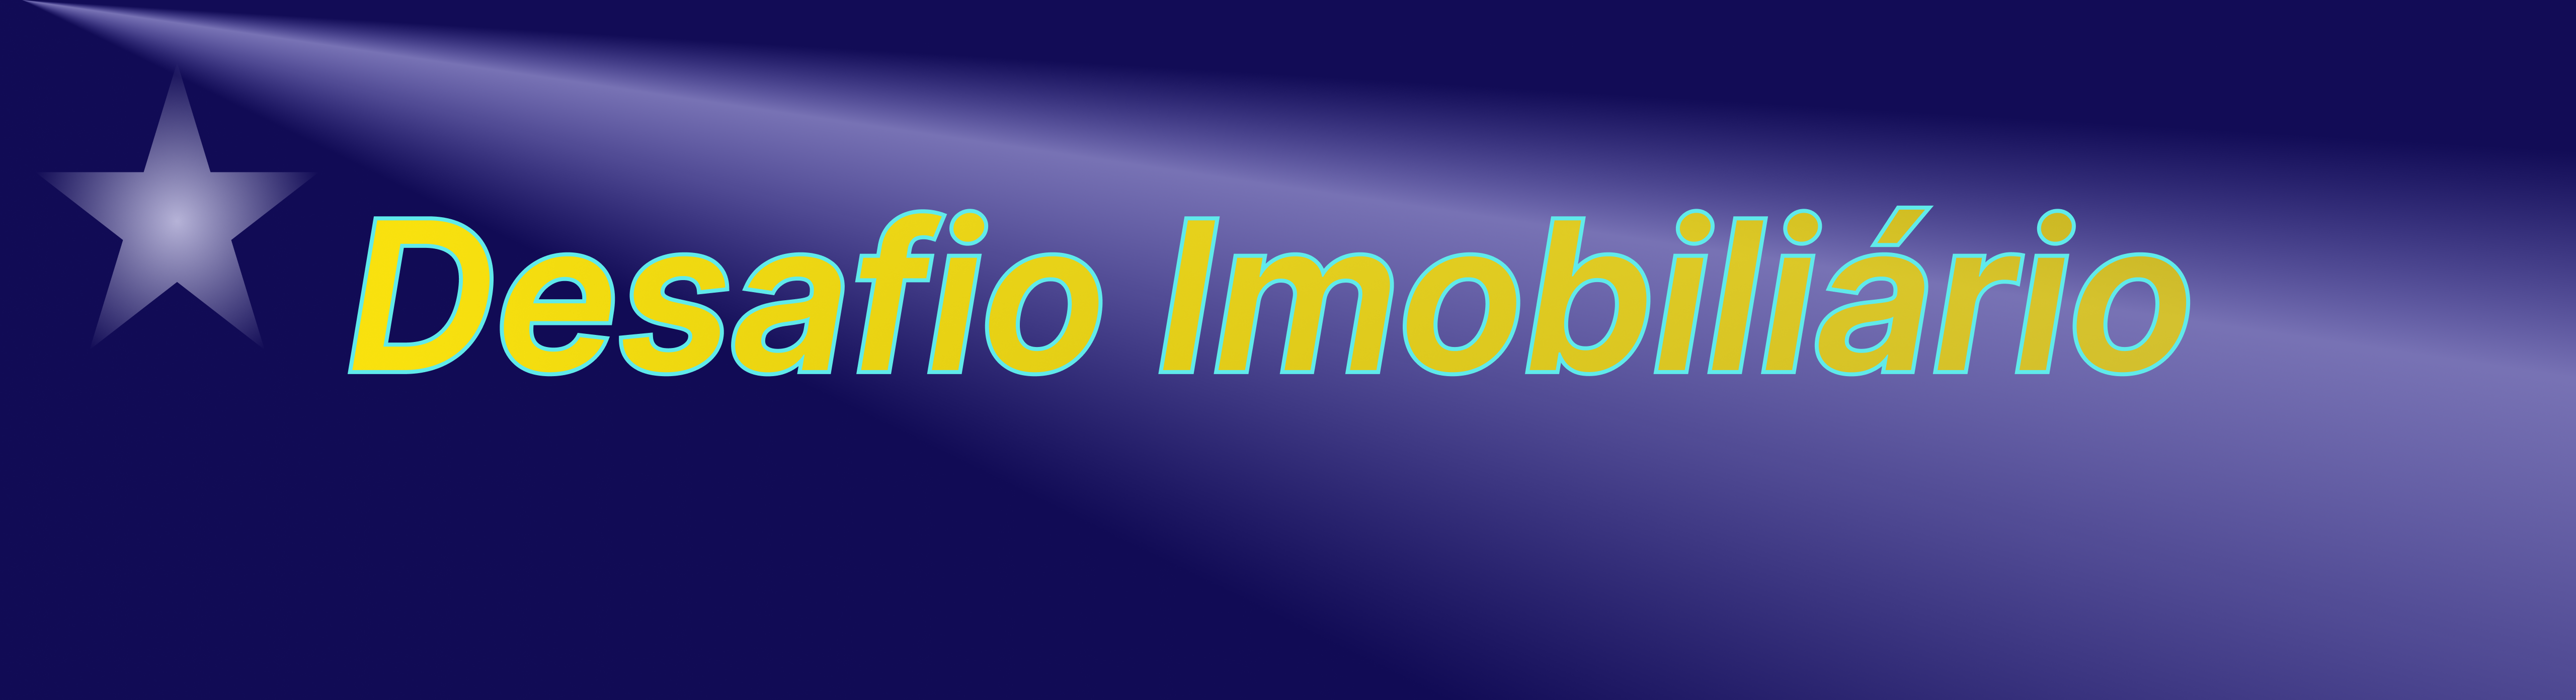

# Desafio Imobiliário
Retirado de: https://medium.com/@meigarom/os-5-projetos-de-data-science-que-far%C3%A1-o-recrutador-olhar-para-voc%C3%AA-c32c67c17cc9

**Descrição:** 

A ideia central reside no desafio de comprar boas casas em boas localizações a preços baixos para revenda. Dessa forma, é possível aumentar o lucro da imobiliária.

Os atributos das casas podem torná-las mais o menos atrativas aos vendedores e aos compradores.

As seguintes perguntas devem ser respondidas para gerar os Insights necessários:

1. Quais tipos de casas o CEO da House Rocket deveria comprar e por qual preço de compra?
2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
3. A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?

# Base de dados
**Disponível em:**  https://www.kaggle.com/harlfoxem/housesalesprediction.

A base de dados reúne os atributos de casas vendidas em King County (USA-Washington) incluindo Seattle. As casas foram vendidas entre maio de 2014 e maio de 2015. Abaixo é apresentada uma descrição de cada coluna da base de dados.

**id:** código;

**date:** data da venda;

**price:** preço;

**bedrooms:** número de quartos;

**bathrooms:** número de banheiros;

**sqft_living:** metragem quadrada do espaço interno;

**sqft_lot:** metragem quadrada do lote;

**floors:** número de andares;

**waterfront:** vista para o mar;

**view:** casas visitadas;

**conditions:** estado da casa;

**grade:** classificação (nota geral);

**sqft_above:** metragem quadrada da casa sem considerar a área do porão;

**sqft_basement:** metragem quadrada da área do porão;

**yr_built:** ano de de construção;

**yr_renovated:** ano de reforma;

**zipcode:** código postal;

**lat:** latitude;

**long:** longitude;

**sqft_living15:** metragem quadrada útil em 2015;

**sqft_lot15:** metragem quadrada do lote em 2015.

# **Análise Exploratória Orientada a Diagnóstico**

In [ ]:
#pip install folium
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import numpy as np
import scipy.stats as stats
import folium
from folium.plugins import HeatMap




In [ ]:
df_Houses = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv")

In [ ]:
df_Houses.head(5)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [ ]:
df_Houses.tail(5)

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

**Tamanho da amostra**

In [ ]:
df_Houses.shape

(21613, 21)

**Informações da base de dados**

In [ ]:
df_Houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Não existem valores nulos, mas a data da venda está sendo reconhecida como object (string) e a variável bathrooms está representada como um float64. 


**Realizando alguns tratamentos na base de dados**

Convertendo a variável bathrooms em inteiro.

In [ ]:
df_Houses['bathrooms']= df_Houses['bathrooms'].round(0)
df_Houses['bathrooms']= df_Houses['bathrooms'].astype('int64')

Convertendo a variável data para o tipo datetime.

In [ ]:
df_Houses['date']= pd.to_datetime(df_Houses['date'])

É mais interessante ter somente o ano da venda das casas. Outra coisa importante é determinar a idade das casas vendidas.

In [ ]:
df_Houses['year_sale'] = df_Houses['date'].dt.year

df_Houses['age']= df_Houses['year_sale']- df_Houses['yr_built']

Excluindo colunas não necessárias.

In [ ]:
df_Houses= df_Houses.drop(columns=['id', 'date'], axis=1)

Confirmando as alterações dos tipos.

In [ ]:
df_Houses.dtypes

price            float64
bedrooms           int64
bathrooms          int64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
year_sale          int64
age                int64
dtype: object

**Verificando a variabilidade da amostra**

In [ ]:
df_Houses.nunique()

price            4028
bedrooms           13
bathrooms           9
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
year_sale           2
age               117
dtype: int64

As variáveis price, sqft_living, sqft_lot, lat e sqft_lot15 tem uma variabilidade considerável em seus valores, isto indica, uma possível heterogeneidade. As demais variáveis tem uma variabilidade moderada dado o tamanho da amostra.

**Resumo das estatísticas da base.**

In [ ]:
df_Houses.describe().T.drop(index=['zipcode', 'lat', 'long', 'year_sale'], columns=['count'])


mean            std      min       25%       50%  \
price          540088.141767  367127.196483  75000.0  321950.0  450000.0   
bedrooms            3.370842       0.930062      0.0       3.0       3.0   
bathrooms           2.058715       0.755524      0.0       2.0       2.0   
sqft_living      2079.899736     918.440897    290.0    1427.0    1910.0   
sqft_lot        15106.967566   41420.511515    520.0    5040.0    7618.0   
floors              1.494309       0.539989      1.0       1.0       1.5   
waterfront          0.007542       0.086517      0.0       0.0       0.0   
view                0.234303       0.766318      0.0       0.0       0.0   
condition           3.409430       0.650743      1.0       3.0       3.0   
grade               7.656873       1.175459      1.0       7.0       7.0   
sqft_above       1788.390691     828.090978    290.0    1190.0    1560.0   
sqft_basement     291.509045     442.575043      0.0       0.0       0.0   
yr_built         1971.005136      29.373411   1900.0    1951.0    1975.0   
yr_renovated       84.402258     401.679240      0.0       0.0       0.0   
sqft_living15    1986.552492     685.391304    399.0    1490.0    1840.0   
sqft_lot15      12768.455652   27304.179631    651.0    5100.0    7620.0   
age                43.317818      29.375493     -1.0      18.0      40.0   

                    75%        max  
price          645000.0  7700000.0  
bedrooms            4.0       33.0  
bathrooms           2.0        8.0  
sqft_living      2550.0    13540.0  
sqft_lot        10688.0  1651359.0  
floors              2.0        3.5  
waterfront          0.0        1.0  
view                0.0        4.0  
condition           4.0        5.0  
grade               8.0       13.0  
sqft_above       2210.0     9410.0  
sqft_basement     560.0     4820.0  
yr_built         1997.0     2015.0  
yr_renovated        0.0     2015.0  
sqft_living15    2360.0     6210.0  
sqft_lot15      10083.0   871200.0  
age                63.0      115.0

O desvio padrão  das variáveis price, sqft_living, sqft_lot, sqft_basement, yr_renovated, sqft_living15, sqft_lot15 e age estão com valores altos em comparação à média. Isto indica que estas variáveis tendem a heterogenia, com um alto grau de dispersão dos dados em relação à média.

Além disso, algumas afirmações podem ser deduzidas:

- 50% das casas possuem dois quartos;
- 75% das casas não possuem vista para o mar;
- 75% das casas não foram visitadas;
- 50% das casas não tem porão;
- 75% das casas não foram reformadas.

Alguns valores discrepantes são identificados pela função max, como por exemplo:
-  casas vendidas por 7 milhões e 700 mil;
-  casas com 33 quartos;
-  casas com 8 banheiros;
- espaço interno de 13.540 metros quadrados.
- área do lote de 1.651.359 metros quadrados.
- área sem o porão de 9.410 metros quadrados;
- área do porão de 4.820 metros quadrados;
- área útil em 2015 de 6.210 metros quadrados;
- área do lote em 2015 de 871.200 metros quadrados.

 Algumas casas possuem idade igual a -1, o que significa esta informação?

In [ ]:
df_Houses.loc[df_Houses['age']== -1].head(3)

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
1763  597326.0         4          4         3570      8250     2.0   
2687  385195.0         1          1          710      6000     1.5   
7526  614285.0         5          3         2730      6401     2.0   

      waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
1763           0     0          3     10  ...            710      2015   
2687           0     0          3      6  ...              0      2015   
7526           0     0          3      8  ...              0      2015   

      yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
1763             0    98040  47.5784 -122.226           2230       10000   
2687             0    98144  47.5756 -122.316           1440        4800   
7526             0    98072  47.7685 -122.160           2520        6126   

      year_sale  age  
1763       2014   -1  
2687       2014   -1  
7526       2014   -1  

[3 rows x 21 columns]

Estas casas com idade igual a -1 foram vendidas antes de sua construção, provavelmente em encarte.

**Verificando a presença de valores discrepantes**

Análise de valores discrepantes 



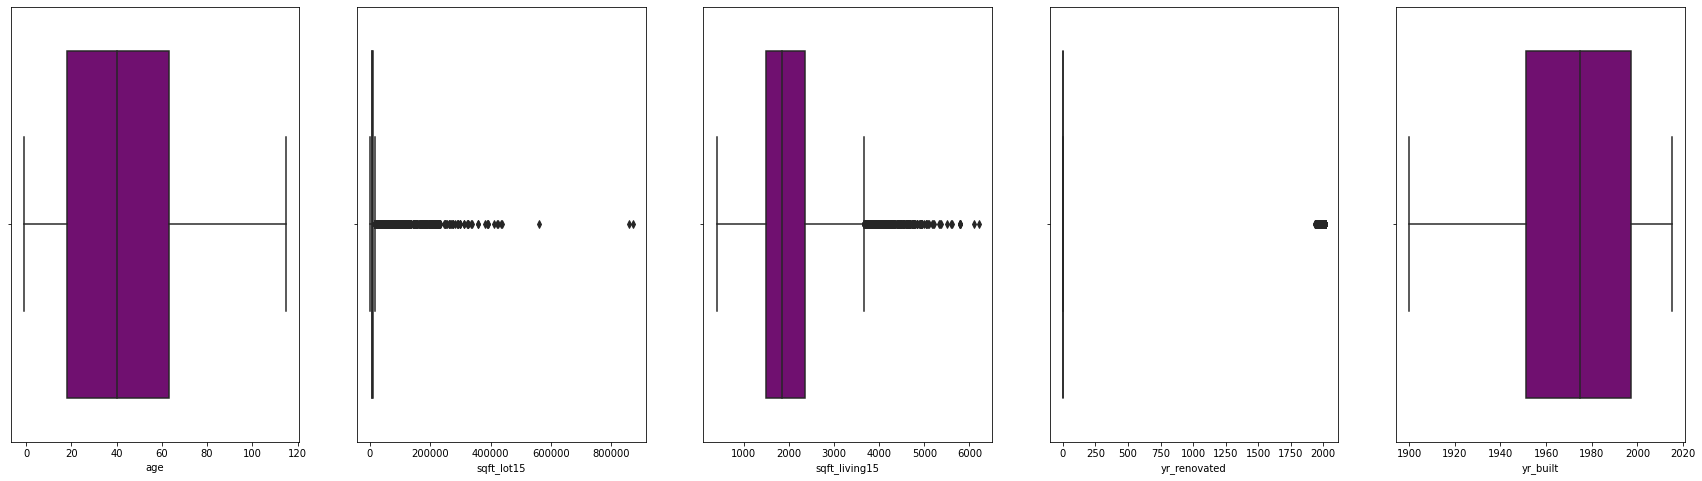

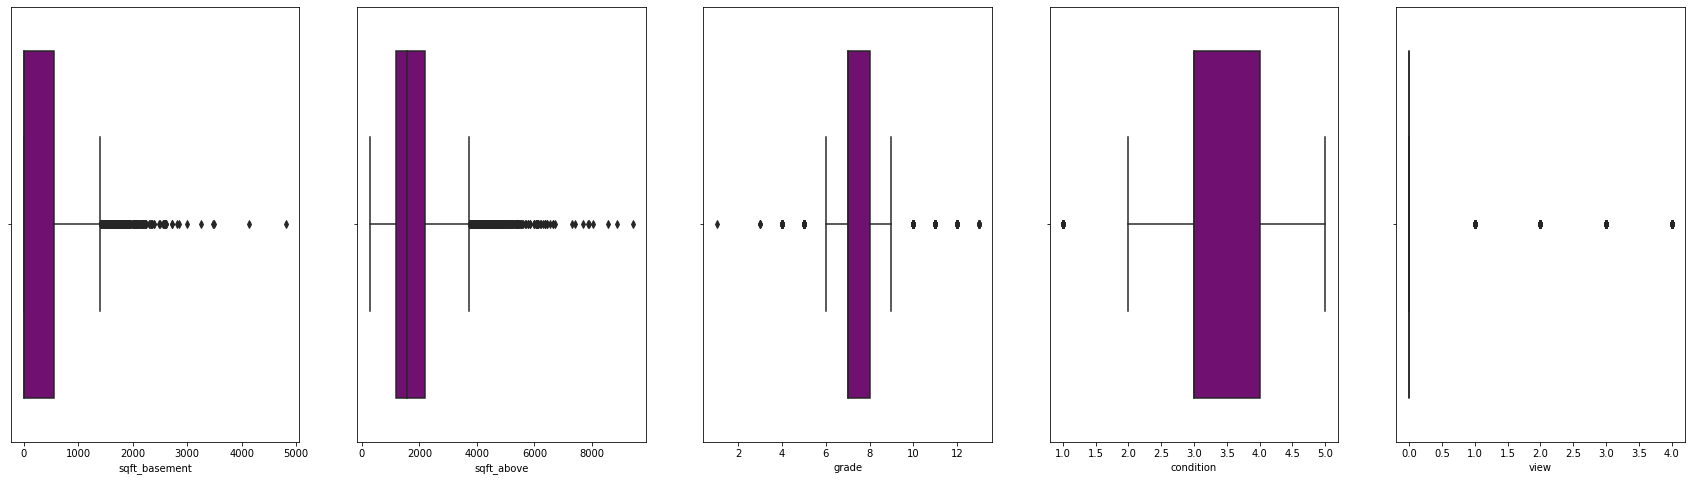

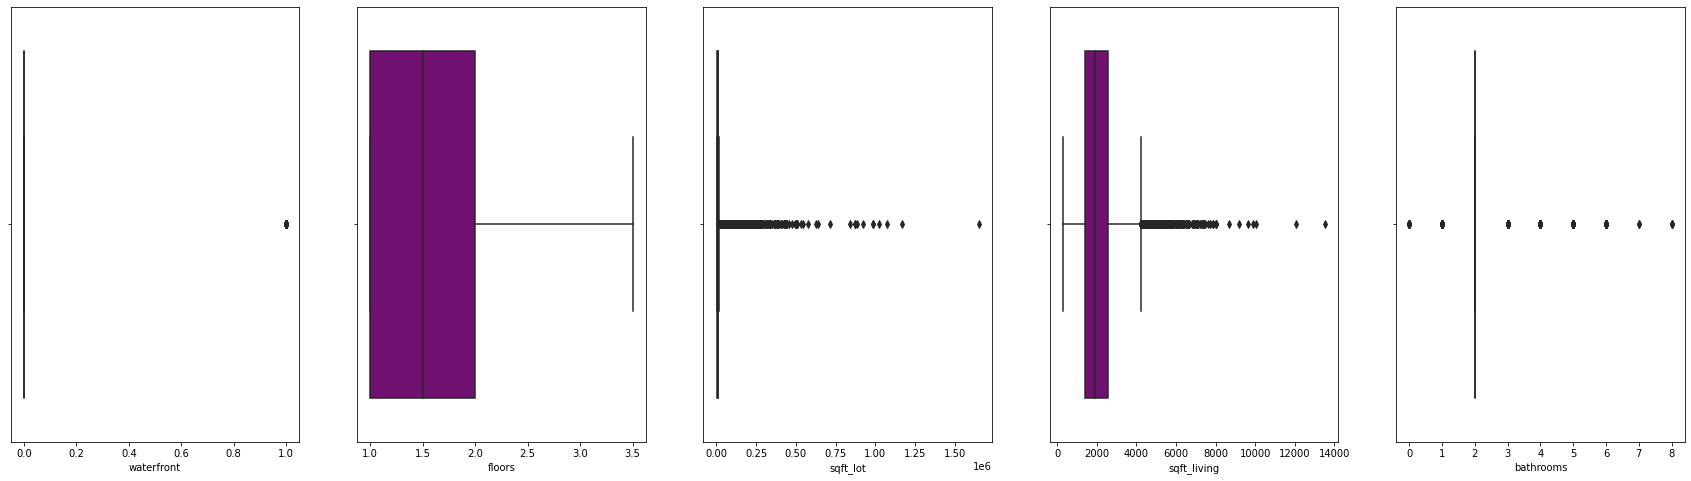

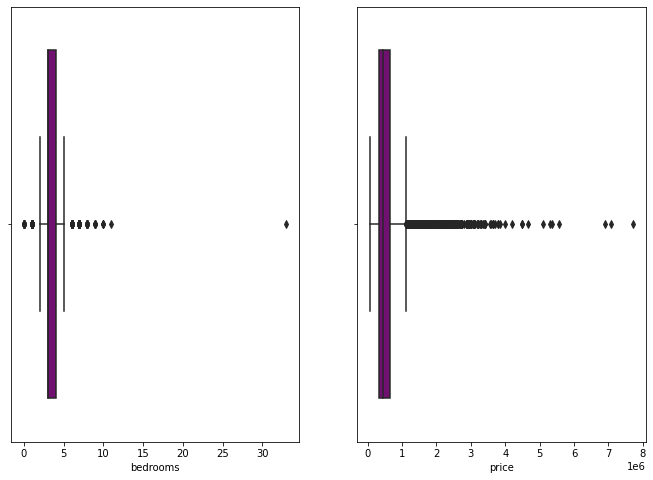

In [ ]:
list= df_Houses.columns.tolist()
list.remove('year_sale')
list.remove('long')
list.remove('lat')
list.remove('zipcode')
while len(list) != 0:
     plt.figure(figsize=(30,8))
     for i in range(1, 6):
        if len(list) == 0:
          break
        plt.subplot(1, 5, i)
        sn.boxplot(x= list.pop(), data = df_Houses, color='purple')
print('\033[1m' +'Análise de valores discrepantes'+'\033[0m \n')
plt.show()


Os boxplots mostram que as variáveis da amostra possuem distribuições assimétricas, algumas com cauda à direita e outras com cauda à esquerda. Além disso, existem muitos outliers os quais impactam nos valores das médias de maneira negativa, o que dificulta a tomada de decisão.

Considerando os gráficos, o que chama a atenção é: 


*   sqft_15 e sqft_lot: as áreas dos lotes estão concentradas em 0;
*   yr_renovated: as casas reformadas são vistas como outliers;
*   sqft_basement: as áreas dos porões maiores que 1.500 (mais ou menos) são consideradas outliers;
*   sqft_above: as áreas das casas sem o porão maiores 4.000 são consideradas outliers; 
*   grade: as notas gerais das casas possuem uma homogeneidade entre 6 e 9;
*   condition: casas com estado menor que 2 são outliers;
*   view: as visitas nas casas são consideradas outliers;
*   bathrooms: casas com mais de 2 banheiros ou com menos de 2 banheiros são outliers ;
*   bedrooms: a amostra possui uma quantidade de quartos que varia entre 1 a 5 quartos, fora essa faixa os valores são outliers;
*   sqft_living e sqft_living15: as casas com áreas úteis à cima de 4.000 são outliers;
*   price: as casas cujo o preço ultrapassa 1 milhão são outliers.

 **Redução dos outliers de alguns itens da amostra**

Para encontrar um padrão de casas com uma maior possibilidade de reforma e venda visando o lucro, serão realizados alguns filtros seguindo a tendência geral da amostra. Tais filtros são:

- o número de banheiros será limitado entre 1 a 3;
- o número de quartos será limitado entre 1 a 5;
- a nota geral das casas será limitada entre 5 a 9.

In [ ]:
df_Houses = df_Houses.loc[(df_Houses.bathrooms > 0) & (df_Houses.bathrooms <= 3)]
df_Houses = df_Houses.loc[(df_Houses.bedrooms > 0) & (df_Houses.bedrooms <= 5)]
df_Houses = df_Houses.loc[(df_Houses.grade >= 5) & (df_Houses.grade <= 9)]

Para tentar alcançar uma homogeneidade na variável preço, serão removidos os outliers.

In [ ]:
info = df_Houses['price'].describe()  
iq_range = info['75%'] - info['25%']
range = (info['25%'] - 1.5 * iq_range, info['75%'] + 1.5 * iq_range)
df_Houses = df_Houses[df_Houses['price'].between(*range)]

**Tamanho da amostra final**

In [ ]:
df_Houses.shape

(18511, 21)

O tamanho da amostra final foi reduzido consideravelmente, mas,  a amostra final tende a refletir as tendências do mercado imobiliário em questão.


**Análise do formato da distribuição da variável Preço**

Como quer-se encontrar casas com bons preços, o formato da distribuição da variável preço é o principal em estudo. A partir dele, pode-se definir qual a melhor medida de tendência central a ser usada.

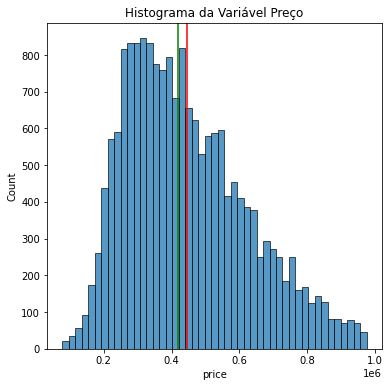

In [ ]:
plt.figure(figsize=(6,6))
sn.histplot(df_Houses['price'])  
plt.axvline(df_Houses['price'].mean(), color='r')  
plt.axvline(df_Houses['price'].median(), color='g') 
plt.title('Histograma da Variável Preço')
plt.show()

Mesmo aplicando o método de remoção de outliers, a distribuição de preços continua assimétrica. No histograma pode-se ver que a medida de tendência central a ser usada na tomada de decisão deve ser a mediana. Já que ela está mais perto do pico da concentração de dados.

**Tabela de Correlação entre as variáveis**

O coeficiente de correlação escolhido foi o de Spearman porque as distribuições das variáveis não são normais.

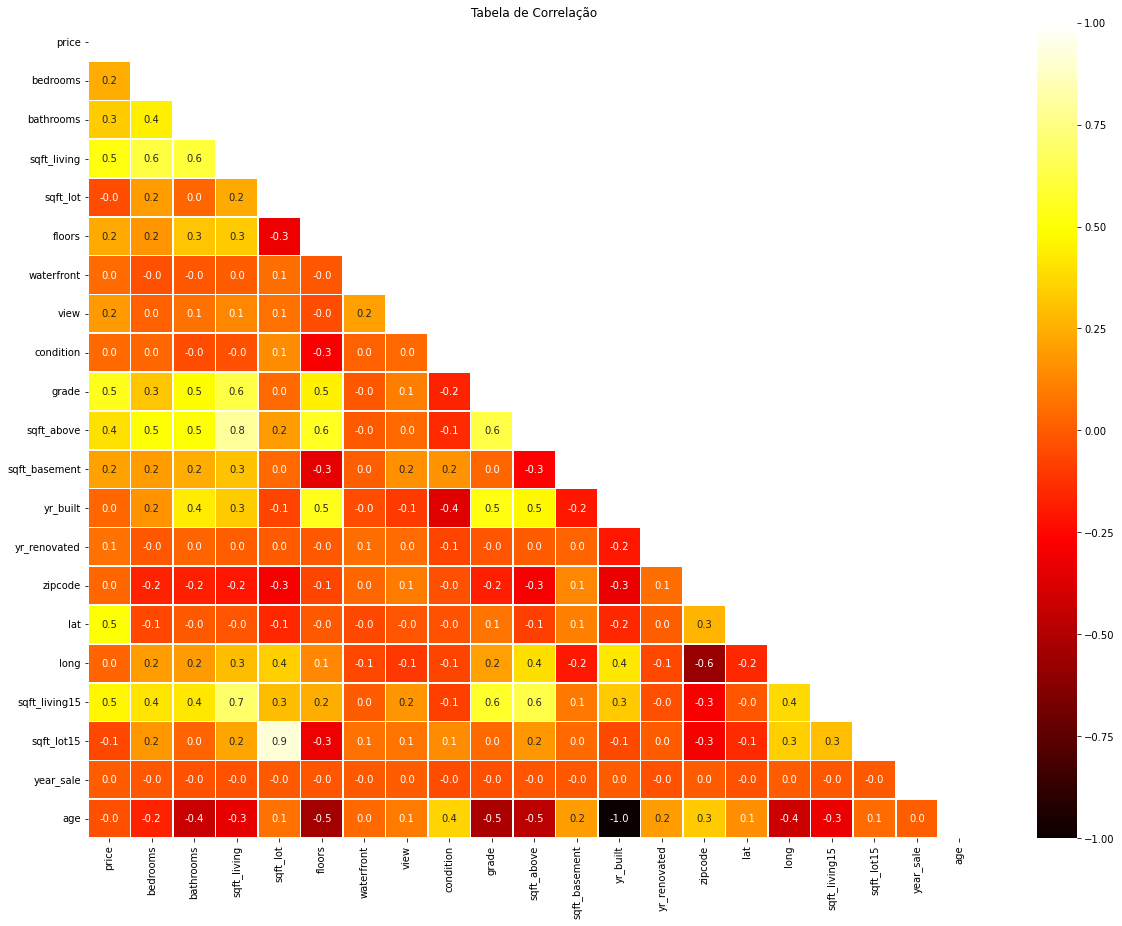

In [ ]:
plt.figure(figsize = (20, 15))
correlation = df_Houses.corr(method= 'spearman') 
sn.heatmap(correlation, vmin = -1, vmax = +1, annot=True, cmap='hot', fmt=".1f", linewidths=.6, mask =np.triu(correlation))
plt.title('Tabela de Correlação')
plt.show()


As variáveis que possuem algum grau de correlação com a variável preço são:

- Correlação positiva fraca:
  - bedrooms;
  - bathrooms;
  - floors;
  - view;
  - sqft_basement.

- Correlação positiva moderada:
  - sqft_living;
  - grade;
  - sqft_above;
  - lat;
  - sqft_living15.

Não existem correlações negativas significativas com a variável preço. 

**1. Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?**

A estratégia adotada é explorar as características das casas que tem algum tipo de correlação com a variável preço, a fim de extrair os insights que respondem à pergunta.

**Em primeiro lugar, quais são as tendências do mercado?**

In [ ]:
list = ['price','bedrooms','bathrooms','floors', 'waterfront','grade','sqft_living','sqft_basement','age']
for col in list:
  print(col + ':', df_Houses[col].mode()[0])

price: 350000.0
bedrooms: 3
bathrooms: 2
floors: 1.0
waterfront: 0
grade: 7
sqft_living: 1300
sqft_basement: 0
age: 9


As casas mais procuradas custam 350.000 mil, tem três quartos, dois banheiros, um andar, não possuem vista para o mar, tem nota geral sete, metragem quadrada de 1.300 de área útil, não possuem porão e tem em torno de 9 anos de idade.

**A latitude das casas está relacionada com os preços, o que isto quer dizer?**

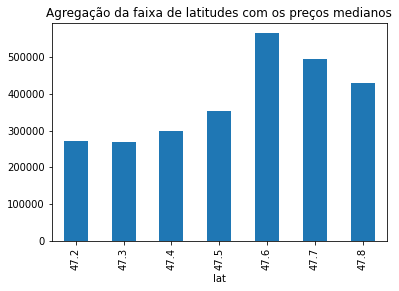

In [ ]:
df_Houses.groupby(df_Houses['lat'].round(1))['price'].median().plot(kind='bar')
plt.title('Agregação da faixa de latitudes com os preços medianos')
plt.show()

Latitudes mais altas caracterizam uma região com casas cujos preços são mais altos. A região definida pelas latitudes altas deve ser uma área mais nobre, ou seja, não suburbana.

**Qual a disposição de preços das casas no espaço geográfico definido?**

In [ ]:
print('\033[1m' + 'Mapa de Calor geográfico com a distribuição das casas' +'\033[0m \n')

map = folium.Map(location=[df_Houses['lat'].mean(), df_Houses['long'].mean()], zoom_start = 9)
HeatMap(data = df_Houses[['lat','long','price']].values
                       , radius=8, max_zoom=13, name='Heat Map').add_to(map)                     
folium.LayerControl(collapsed = False).add_to(map) 
map 


Mapa de Calor geográfico com a distribuição das casas 



Segundo o mapa,  ao largo da região que abrange Seattle e Shoreline tem uma grande concentração de casas com preços altos. Esta região, pode ser uma área nobre cujas casas tem excelentes atributos.

Existem outros pontos esparsos com casas cujos preços são mais altos. Outra tendência de preços apresentada pelo mapa é que nas centralidades das regiões os preços sobem.

**Qual o padrão ou a tendência dos preços conforme as características mais relevantes das casas?**

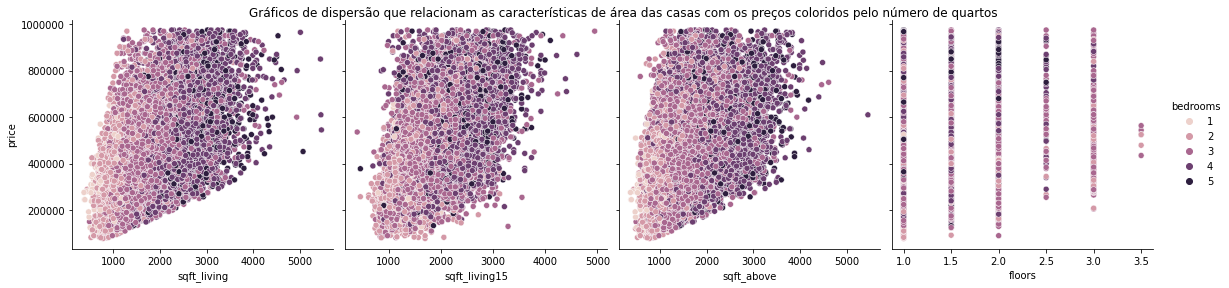

In [ ]:
sn.pairplot(data=df_Houses, x_vars=['sqft_living','sqft_living15' ,'sqft_above', 'floors'], y_vars=["price"], hue='bedrooms', height= 4)
plt.ticklabel_format(style='plain')
plt.suptitle('Gráficos de dispersão que relacionam as características de área das casas com os preços coloridos pelo número de quartos')
plt.show()

A tendência é que as casas com áreas maiores possuem mais quartos, apresentando uma elevação nos preços. 

O número de andares em si não tem muita correlação com o incremento do número de quartos. Ainda assim, a medida que a casa possui mais andares e mais quartos, o peço tende a subir.

Na faixa de preços entre 200 mil e 400 mil tem-se casas com áreas úteis consideráveis, variados números de quartos e variados números de andares, além disso, nesta faixa os preços são relativamente razoáveis.


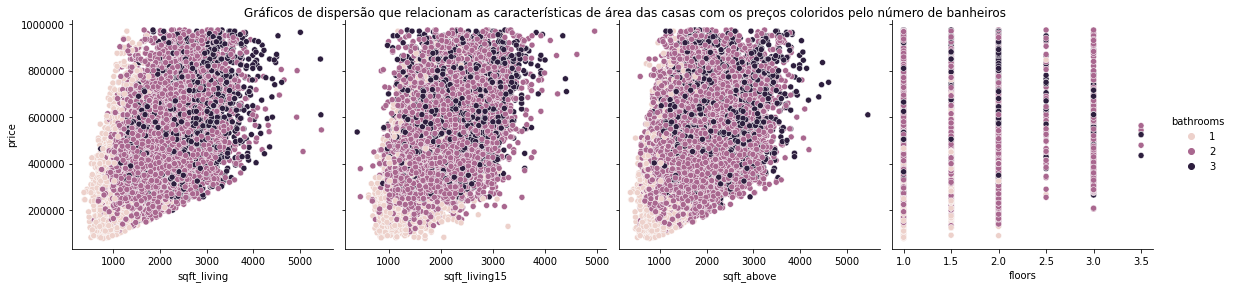

In [ ]:
sn.pairplot(data=df_Houses, x_vars=['sqft_living','sqft_living15' ,'sqft_above', 'floors'], y_vars=["price"], hue='bathrooms', height= 4)
plt.ticklabel_format(style='plain')
plt.suptitle('Gráficos de dispersão que relacionam as características de área das casas com os preços coloridos pelo número de banheiros')
plt.show()

A tendência é que com o aumento da área a quantidade de banheiros cresce incrementando o preço das casas.

O número de banheiros não tem um padrão específico correlacionado com o número de andares, mas, as casas com mais de um andar tendem a terem mais de um banheiro e possuem preços mais elevados. 

À cima dos 400 mil existe um maior número de occorências de casas com três banheiros, o que ressalta a tendência encontrada. 

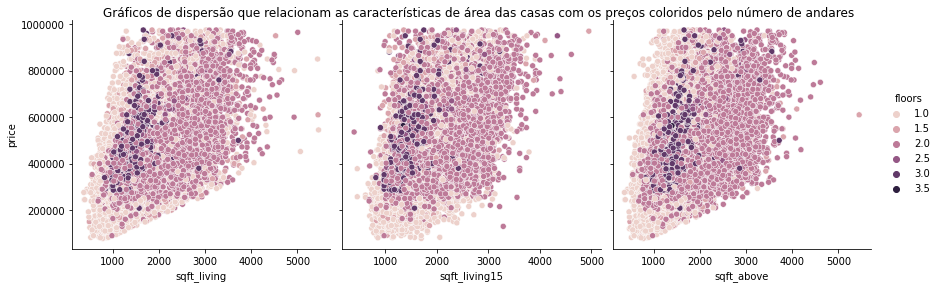

In [ ]:
sn.pairplot(data=df_Houses, x_vars=['sqft_living','sqft_living15' ,'sqft_above'], y_vars=["price"], hue='floors', height= 4)
plt.ticklabel_format(style='plain')
plt.suptitle('Gráficos de dispersão que relacionam as características de área das casas com os preços coloridos pelo número de andares')
plt.show()

A relação entre as variáveis de área, número de andares e o preço não segue um padrão específico. Isto significa que mesmo aumentando o número de andares não quer dizer que aumenta o espaço interno da casa incrementando o preço. 

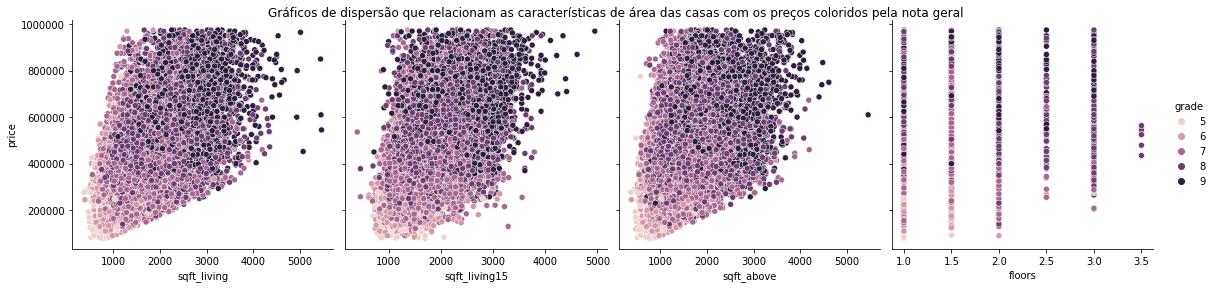

In [ ]:
sn.pairplot(data=df_Houses, x_vars=['sqft_living','sqft_living15' ,'sqft_above', 'floors'], y_vars=["price"], hue='grade', height= 4)
plt.ticklabel_format(style='plain')
plt.suptitle('Gráficos de dispersão que relacionam as características de área das casas com os preços coloridos pela nota geral')
plt.show()

A tendência é que o aumento da área e do número de andares incrementa a nota geral das casas, levando a subir o preço. Casas com classificações mais altas possuem um incremento de preço considerável, principalmente à cima dos 400 mil.

Na faixa de preços entre 200 mil e 400 mil tem-se casas com notas gerais razoáveis em comparação com o preço.

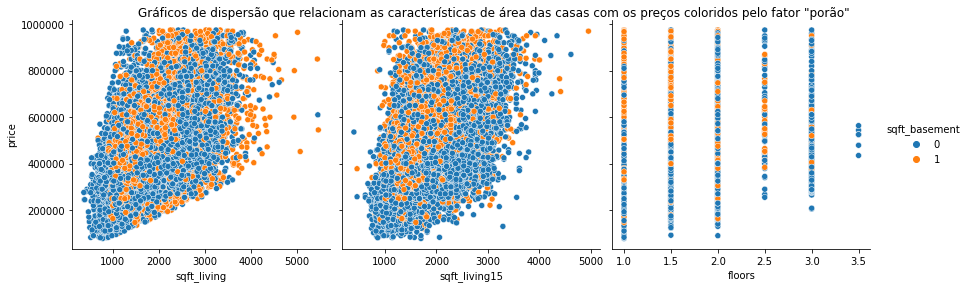

In [ ]:
df_Houses.loc[df_Houses.sqft_basement!=0, 'sqft_basement']=1
sn.pairplot(data=df_Houses, x_vars=['sqft_living','sqft_living15', 'floors'], y_vars=["price"],hue='sqft_basement', height= 4)
plt.ticklabel_format(style='plain')
plt.suptitle('Gráficos de dispersão que relacionam as características de área das casas com os preços coloridos pelo fator \"porão\"')
plt.show()

A tendência é que o fato da casa possuir um porão influência no tamanho da área das casas, tendo uma correlação fraca com o preço. Porém, as casas com porão possuem um incremento de preço considerável à cima dos 400 mil.  Outro fator interessante é que conforme o número de andares aumenta o número de casas com porão tende a diminuir.

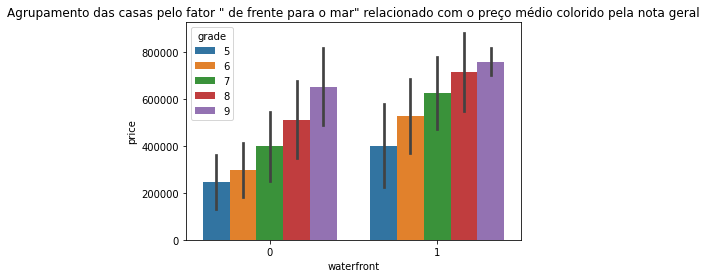

In [ ]:
sn.barplot(data=df_Houses, x='waterfront', y='price', hue='grade', errorbar="sd")
plt.title('Agrupamento das casas pelo fator \" de frente para o mar\" relacionado com o preço médio colorido pela nota geral')
plt.show()

O gráfico mostra que as casas com frente para o mar, são, em média, mais caras que as continentais. Conforme a nota geral do grupo das casas de frente para o mar aumenta,o preço incrementa, seguindo o mesmo padrão das casas continentais.Os desvios padrão, representados pelas barras de erro mostram uma grande dispersão dos dados em relação às médias calculadas.

**Será que entre a faixa de preços de 200 mil a 400 mil existem casas de frente para o mar? E quais são os atributos das mesmas?**

In [ ]:
Selected_houses= df_Houses.loc[(df_Houses.price>=200000) & (df_Houses.price<=400000)]
Selected_houses.loc[df_Houses.waterfront==1].groupby(['grade','bedrooms','bathrooms','floors','price'])['price'].count()


grade  bedrooms  bathrooms  floors  price   
5      1         1          1.0     285000.0    1
                                    369900.0    1
       2         1          1.0     290000.0    1
6      2         1          1.0     340000.0    1
                                    385000.0    1
       4         1          1.0     340000.0    1
7      3         2          1.0     357000.0    1
                            2.0     400000.0    1
Name: price, dtype: int64

Sim existem, e com boas notas gerais.

**Conclusões**
- A House Rocket deve comprar casas que seguem o padrão do mercado geral com as características mais procuradas pelos clientes. As quais são:  preço de 350 mil, três quartos, dois banheiros, um andar, sem vista para o mar, tem nota geral sete, metragem quadrada de 1.300 de área útil, não possuem porão e tem em torno de 9 anos.
- Em termos de localização geográfica, a House Rocket deve selecionar casas na região mais central, evitando latitudes muito baixas para evitar subúrbios.
- A faixa de preços que cobre as características principais das casas está entre 200 mil e 400 mil. Nesta faixa de valores, encontram-se casas em boas condições, apesar de cobrir casas com até três andares.
- Uma boa pedida é ter uma ou duas casas com vista para o mar. A escolha dessas casas deve seguir a tendência geral do mercado. A melhor opção é comprar casas com nota geral 7, pois, não necessitará reformas e pode gerar uma boa margem de lucro. 
- Uma tentativa de aumento de lucro para a empresa é comprar casas com notas gerais baixas e fazer uma reforma para incrementar o preço. Porém, deve-se considerar que o custo da reforma pode abater boa parte do lucro da empresa dependendo do estado da casa escolhida.

**2. Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**

In [ ]:
df_Houses['year_sale'].value_counts(normalize=True).round(2)

2014    0.68
2015    0.32
Name: year_sale, dtype: float64

In [ ]:
df= pd.DataFrame(df_Houses.groupby('year_sale')['price'].median().round(2))
df['difference'] = df['price'].diff()
df.fillna(0, inplace=True)
display(df)

price  difference
year_sale                      
2014       416000.0         0.0
2015       420000.0      4000.0

**Conclusões**
- A única informação de tempo que temos é o ano das vendas, e com relação a isto, 68% das casas foram vendidas em 2014. 
Apesar que o preço mediano incrementou 4.000 mil de 2014 para 2015, isto não é informação suficiente para afirmar que as casas devem ficar na posse da empresa durante um ano e que o valor do incremento do preço seja o da mediana de preços.

- Para responder essa pergunta corretamente faltam dados, como, o preço de custo das casas e o número de anos ou meses que levou para vendê-las.

- A melhor resposta é seguir a taxa de valorização do mercado imobiliário. Quando o valor das cotações subirem gerando lucro para a empresa, as casas podem ser postas à venda. Já o tempo que isso leva para acontecer não tem como ser determinado depende da conjuntura atual em questão.

**A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

**3.1. A House Rocket deveria fazer uma reforma para aumentar o preço da venda?**

- A empresa pode avaliar uma opção de reforma para tentar aumentar a nota geral da casa na tentativa de incrementar o lucro.
Porém, deve-se levar em consideração o custo benefício da reforma, pois, as reformas geram um custo alto dependendo do estado da casa e da opção de reforma.

**3.2 Quais seriam as sugestões de mudanças?**

- Conforme a tabela de correlação entre as variáveis, as opções de reforma seriam: aumentar o número de quartos, aumentar o número de banheiros e aumentar o número de andares das casas. Pois, estas opções de reforma aumentam a área do espaço interno das casas e aumentam a nota geral das casas, gerando um incremento de preço.

**Qual o incremento no preço dado por cada opção de reforma?**

Primeiramente, será calculada a taxa média do aumento percentual de preço mediano entre as notas gerais das casas.

In [ ]:
df_grade= pd.DataFrame(df_Houses.groupby('grade')['price'].median())

# calculando a diferença de preços entre o número de andares presente na casa
df_grade['diff'] = df_grade['price'].diff()
df_grade.fillna(0, inplace=True)

# calculando o aumento percentual entre o preço dos andares
for i in df_grade.index:
  if i==5:
    df_grade['Aument_percent']= 0.0
  else:
    #aumento percentual: divida a diferença pelo valor inicial e multiplique por 100
    df_grade['Aument_percent'][i]= (df_grade['diff'][i]/df_grade['price'][i-1])*100
print('\033[1m' +'Tabela de aumento percentual dos preços medianos conforme a nota geral'+'\033[0m \n')
display(df_grade)

Tabela de aumento percentual dos preços medianos conforme a nota geral 



price      diff  Aument_percent
grade                                    
5      226225.0       0.0        0.000000
6      275000.0   48775.0       21.560393
7      372500.0   97500.0       35.454545
8      499925.0  127425.0       34.208054
9      657500.0  157575.0       31.519728

In [ ]:
print('\033[1m' + 'Aumento percentual médio: ' +'\033[0m ', round(df_grade['Aument_percent'].sum()/(df_grade.shape[0]-1), 2))

Aumento percentual médio:   30.69


 **1. Aumento do número de quartos da casa**

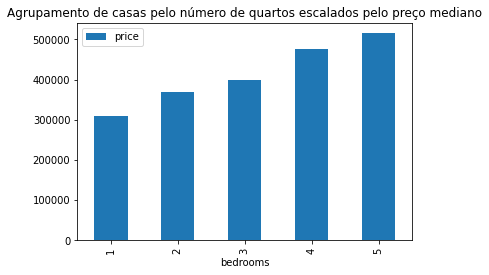

In [ ]:
df_bedrooms = pd.DataFrame(df_Houses.groupby(['bedrooms'])['price'].median())
df_bedrooms.plot(kind='bar');
plt.title('Agrupamento de casas pelo número de quartos escalados pelo preço mediano')
plt.show()

O preço mediano segue um padrão de incremento segundo o aumento do número de quartos da casa. A seguir é calculada a taxa de aumento percentual do preço mediano em relação ao aumento do número de quartos. 

In [ ]:
# calculando a diferença de preços entre o número de quartos presente na casa
df_bedrooms['diff'] = df_bedrooms['price'].diff()
df_bedrooms.fillna(0, inplace=True)

# calculando o aumento percentual entre o preço dos quartos
for i in df_bedrooms.index:
  if i==1:
    df_bedrooms['Aument_percent']= 0.0
  else:
    #aumento percentual: divida a diferença pelo valor inicial e multiplique por 100
    df_bedrooms['Aument_percent'][i]= (df_bedrooms['diff'][i]/df_bedrooms['price'][i-1])*100
print('\033[1m' +'Tabela de aumento percentual dos preços medianos conforme o número de quartos'+'\033[0m \n')
display(df_bedrooms)

Tabela de aumento percentual dos preços medianos conforme o número de quartos 



price     diff  Aument_percent
bedrooms                                   
1         308450.0      0.0        0.000000
2         370000.0  61550.0       19.954612
3         398000.0  28000.0        7.567568
4         475000.0  77000.0       19.346734
5         515000.0  40000.0        8.421053

In [ ]:
print('\033[1m' + 'Aumento percentual médio: ' +'\033[0m ', round(df_bedrooms['Aument_percent'].sum()/(df_bedrooms.shape[0]-1), 2))

Aumento percentual médio:   13.82


O incremento no preço de cada casa a qual se adicionará mais um quarto, a partir da reforma, deve ser:
- preço de compra + custo da reforma + 13.82% do preço de compra + 30.69% do preço de compra (*).

(*) -> caso a nota geral da casa tenha aumentado.

**2. Aumento do número de banheiros da casa**

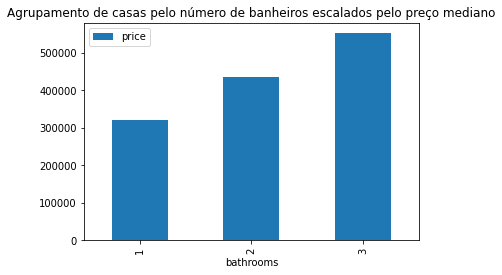

In [ ]:
df_bathrooms = pd.DataFrame(df_Houses.groupby(['bathrooms'])['price'].median())
df_bathrooms.plot(kind='bar');
plt.title('Agrupamento de casas pelo número de banheiros escalados pelo preço mediano')
plt.show()

O preço mediano segue um padrão de incremento segundo o aumento do número de banheiros da casa. A seguir é calculada a taxa de aumento percentual do preço mediano em relação ao aumento do número de banheiros. 

In [ ]:
# calculando a diferença de preços entre o número de banheiros presente na casa
df_bathrooms['diff'] = df_bathrooms['price'].diff()
df_bathrooms.fillna(0, inplace=True)

# calculando o aumento percentual entre o preço dos banheiros
for i in df_bathrooms.index:
  if i==1:
    df_bathrooms['Aument_percent']= 0.0
  else:
    #aumento percentual: divida a diferença pelo valor inicial e multiplique por 100
    df_bathrooms['Aument_percent'][i]= (df_bathrooms['diff'][i]/df_bathrooms['price'][i-1])*100
print('\033[1m' +'Tabela de aumento percentual dos preços medianos conforme o número de banheiros'+'\033[0m \n')
display(df_bathrooms)

Tabela de aumento percentual dos preços medianos conforme o número de banheiros 



price      diff  Aument_percent
bathrooms                                    
1          320000.0       0.0        0.000000
2          435000.0  115000.0       35.937500
3          552050.0  117050.0       26.908046

In [ ]:
print('\033[1m' + 'Aumento percentual médio: ' +'\033[0m ', round(df_bathrooms['Aument_percent'].sum()/(df_bathrooms.shape[0]-1), 2))

Aumento percentual médio:   31.42


O incremento no preço de cada casa a qual se adicionará mais um banheiro, a partir da reforma, deve ser:
- preço de compra + custo da reforma + 31.42% do preço de compra + 30.69% do preço de compra (*).

(*) -> caso a nota geral da casa tenha aumentado.

**3. Aumento do número de andares da casa**

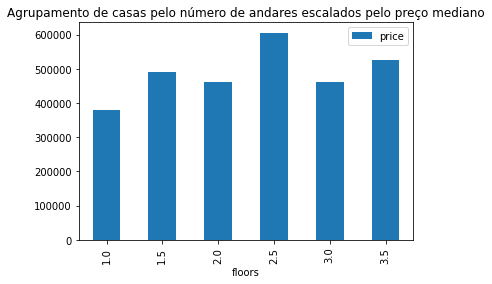

In [ ]:
df_floors = pd.DataFrame(df_Houses.groupby(['floors'])['price'].median())
df_floors.plot(kind='bar');
plt.title('Agrupamento de casas pelo número de andares escalados pelo preço mediano')
plt.show()

O preço mediano não segue um padrão geral de incremento segundo o aumento do número de andares da casa. A seguir é calculada a taxa de aumento percentual do preço mediano em relação ao aumento do número de andares. 

In [ ]:
# calculando a diferença de preços entre o número de andares presente na casa
df_floors['diff'] = df_floors['price'].diff()
df_floors.fillna(0, inplace=True)

# calculando o aumento percentual entre o preço dos andares
for i in df_floors.index:
  if i==1.0:
    df_floors['Aument_percent']= 0.0
  else:
    #aumento percentual: divida a diferença pelo valor inicial e multiplique por 100
    df_floors['Aument_percent'][i]= (df_floors['diff'][i]/df_floors['price'][i-0.5])*100
print('\033[1m' +'Tabela de aumento percentual dos preços medianos conforme o número de andares'+'\033[0m \n')
display(df_floors)

Tabela de aumento percentual dos preços medianos conforme o número de andares 



price      diff  Aument_percent
floors                                    
1.0     378730.0       0.0        0.000000
1.5     490000.0  111270.0       29.379769
2.0     460000.0  -30000.0       -6.122449
2.5     605500.0  145500.0       31.630435
3.0     460500.0 -145000.0      -23.947151
3.5     525000.0   64500.0       14.006515

Note que, para o caso específico do número de andares, existem taxas negativas. Isto se deve ao fato, da variável floors não possuir um padrão de incremento no preço mediano conforme aumenta o número de andares. As taxas negativas refletem uma queda nos preços presente na variação entre o número de andares. Possivelmente outros fatores estão impactando nos preços, como a nota geral.

In [ ]:
print('\033[1m' + 'Aumento percentual médio: ' +'\033[0m ', round(df_floors['Aument_percent'].sum()/(df_floors.shape[0]-1), 2))

Aumento percentual médio:   8.99


O incremento no preço de cada casa a qual se adicionará mais um andar, a partir da reforma, deve ser:
- preço de compra + custo da reforma + 8.99% do preço de compra + 30.69% do preço de compra (*).

(*) -> caso a nota geral da casa tenha aumentado.

(**) -> esta equação pode variar segundo os novos cômodos construídos no andar adicionado.